<a href="https://colab.research.google.com/github/SaraKarim23/Image-Classifier-Neural-Net-CNN/blob/main/Image_Classifier_Neural_Net_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How Neural Net Model Work

It takes an image and for every pixel, it notes down the **RGB** ; which is Red, Green and Blue value of the pixel.
And then these pixels are then converted into an **Array**.

# How to train an image?

In an image for every pixel, there is a value component of RGB. Basically these components are used for training a Neural Net.

# Import Libraries 

In [5]:
import keras
import tensorflow as tf
from keras.datasets import cifar10
from tensorflow import keras
import numpy as np
from tensorflow.keras.optimizers import RMSprop

# Import CIFAR10 Dataset

In [6]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


# Plot an images

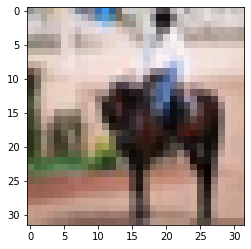

In [7]:

import matplotlib.pyplot as plt
plt.imshow(x_train[11])

In [ ]:
print(x_train[11])

In [9]:
print(y_train[11])

[7]


# Change class vectors to binary class matrices

In [10]:
num_classes = 10 #define the number of classes possible.

print('before',y_test[0])

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


print('after',y_test[0])

#Normalize
x_train  = x_train / 255.0
x_test = x_test / 255.0

before [3]
after [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [11]:
print(y_train[11])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


# Initiate the model

In [12]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                   tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                  tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                  tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# Compile & Train the model

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 8s 4ms/step - loss: 0.8609 - acc: 0.2138
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2604 - acc: 0.3741
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2469 - acc: 0.4185
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2419 - acc: 0.4307
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2380 - acc: 0.4413
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2346 - acc: 0.4546
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2309 - acc: 0.4656
Epoch 8/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2289 - acc: 0.4725
Epoch 9/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2281 - acc: 0.4742
Epoch 10/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2273 - acc: 0.4744
Epoch 11/20
1563/1563 [======

# Evaluate the model & summarize

In [14]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2535 - acc: 0.4304


[0.2535170316696167, 0.430400013923645]

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3146752   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 3,279,242
Trainable params: 3,279,242
Non-trainable params: 0
_________________________________________________________________


# Prediction

In [20]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(32, 32))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  

  print(classes)
  
classes2 = np.argmax(classes, axis=1)

if classes2[0] == 0:
        print('It is an airplane')
elif classes2[0] == 1:
        print('It is an automobile')
elif classes2[0] == 2:
        print('It is a bird')
elif classes2[0] == 3:
        print('It is a cat')
elif classes2[0] == 4:
        print('It is a deer')
elif classes2[0] == 5:
        print('It is a dog')
elif classes2[0] == 6:
        print('It is a frog')
elif classes2[0] == 7:
        print('It is a horse')    
elif classes2[0] == 8:
        print('It is a ship')
elif classes2[0] == 9:
        print('It is a truck')    
else:
        print('Can\'t recognize the image')

print('done')

Saving Horse.jpg to Horse.jpg
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
It is a horse
done
